# Finance Data Project 

In this data project I will focus on exploratory data analysis of stock prices, meant to practice my visualisation and pandas skills and not a robust financial analysis or be taken as financial advice.

Focusing on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

## Data

Acquiring data using pandas datareader of the following banks stock information.
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

**Getting the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Setting each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol.**

In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [3]:
#Bank of America
BAC = data.DataReader('BAC', 'yahoo', start, end)

In [4]:
#CitiGroup
C = data.DataReader('C', 'yahoo', start, end)
#Goldman Sachs
GS = data.DataReader('GS', 'yahoo', start, end)
#JPMorgan Chase
JPM = data.DataReader('JPM', 'yahoo', start, end)
#Morgan Stanley
MS = data.DataReader('MS', 'yahoo', start, end)
#Wells Fargp
WFC = data.DataReader('WFC', 'yahoo', start, end)

Creating a list of the ticker symbols (as strings) in alphabetical order.

In [5]:
tickers = ['BAC','C', 'GS', 'JPM', 'MS', 'WFC']

** Using pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Setting the keys argument equal to the tickers list.**

In [6]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16197900.0  33.955669   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17427400.0  33.595055   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14668900.0  33.638332   
2006-01-06  46.910000  46.349998  46.799999  46.570000  11965700.0  33.587841   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15536300.0  33.609486   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  47.457642   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  48.727718   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  48.603199   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  48.785828   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  48.669609   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  48.403973  6354424.0  33.635536  31.975000  31.195000  31.600000   
2006-01-04  48.437180  9292212.0  33.658634  31.820000  31.365000  31.799999   
2006-01-05  48.569996  6534279.0  33.750919  31.555000  31.309999  31.500000   
2006-01-06  48.619804  8146467.0  33.785522  31.775000  31.385000  31.580000   
2006-01-09  49.134476  4985818.0  34.143177  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11015000.0  20.444870  
2006-01-04  31.530001  10594000.0  20.207739  
2006-01-05  31.495001   9927600.0  20.185299  
2006-01-06  31.680000   8324000.0  20.303867  
2006-01-09  31.674999   5589600.0  20.300665  

[5 rows x 36 columns]

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [8]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16197900.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17427400.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14668900.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  11965700.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15536300.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.955669  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.595055  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.638332  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.587841  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.609486  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   47.457642  48.403973  6354424.0  33.635536  31.975000  31.195000   
2006-01-04   48.727718  48.437180  9292212.0  33.658634  31.820000  31.365000   
2006-01-05   48.603199  48.569996  6534279.0  33.750919  31.555000  31.309999   
2006-01-06   48.785828  48.619804  8146467.0  33.785522  31.775000  31.385000   
2006-01-09   48.669609  49.134476  4985818.0  34.143177  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11015000.0  20.444870  
2006-01-04   31.799999  31.530001  10594000.0  20.207739  
2006-01-05   31.500000  31.495001   9927600.0  20.185299  
2006-01-06   31.580000  31.680000   8324000.0  20.303867  
2006-01-09   31.674999  31.674999   5589600.0  20.300665  

[5 rows x 36 columns]

# EDA

Exploring the data!

**Max Close price for each bank's stock throughout the time period?**

In [9]:
for tick in tickers:
    print(tick, bank_stocks[tick]['Close'].max())

BAC 54.900001525878906
C 564.0999755859375
GS 247.9199981689453
JPM 70.08000183105469
MS 74.12921905517578
WFC 58.52000045776367


In [10]:
#Alternate way
bank_stocks.xs(key='Close', axis=1, level=1).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      74.129219
WFC     58.520000
dtype: float64

**Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock, typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [11]:
returns = pd.DataFrame()

**Using pandas pct_change() method on the Close column to create a column representing this return value. Creating for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [12]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

In [13]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


**Creating a pairplot using seaborn of the returns dataframe.**

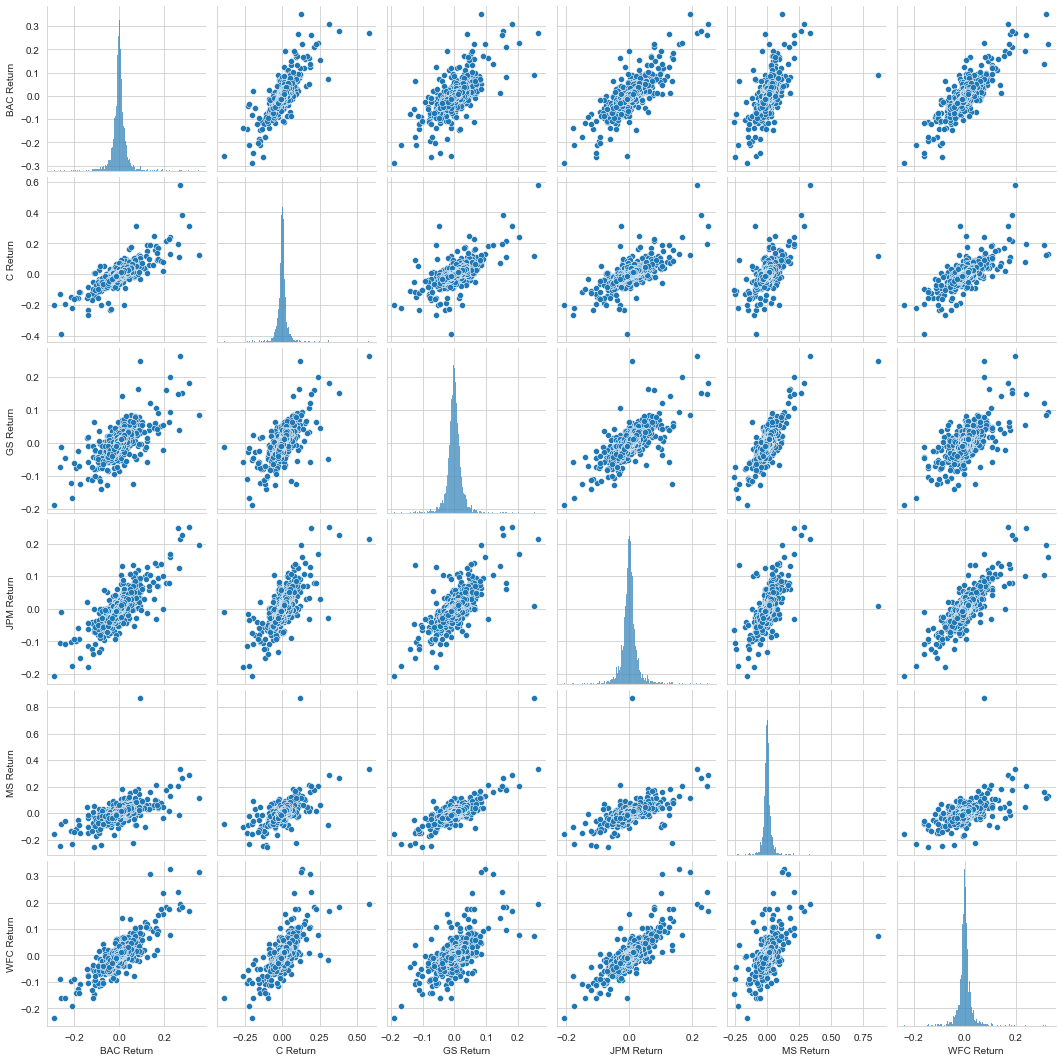

In [14]:
sns.pairplot(returns[1:])

**Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [15]:
# biggest drop in profit:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [16]:
# most profitable day
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

We can make an observation here that most and least profits are around 2008-2009 and researching more on this, I see that financial crisis occurred which I want to visualise later on!

**Taking a look at the standard deviation of the returns, classifying potential riskiest stocks specifically 2015.**

In [17]:
returns.std()
# Citi Group is the riskiest stock here, due to crash

BAC Return    0.036607
C Return      0.038624
GS Return     0.025407
JPM Return    0.027720
MS Return     0.037717
WFC Return    0.030240
dtype: float64

In [18]:
returns.loc['2015-01-01':'2015-12-31'].std()
# Citi Group is normal here

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

**Creating a distplot of the 2015 returns for Morgan Stanley**

C:\Users\mehul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS Return', ylabel='Density'>

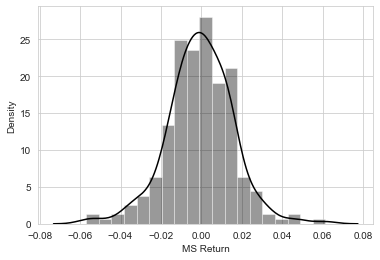

In [19]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color='black')

**Distplot of the 2008 returns for CitiGroup**

C:\Users\mehul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Return', ylabel='Density'>

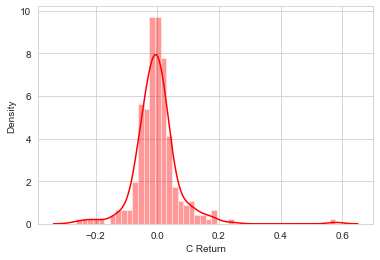

In [20]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], color='red')

Notice that Citi group has small outlier around 0.6, compare to MS Return which was around 0.06

**Creating a line plot showing Close price for each bank for the entire index of time.**

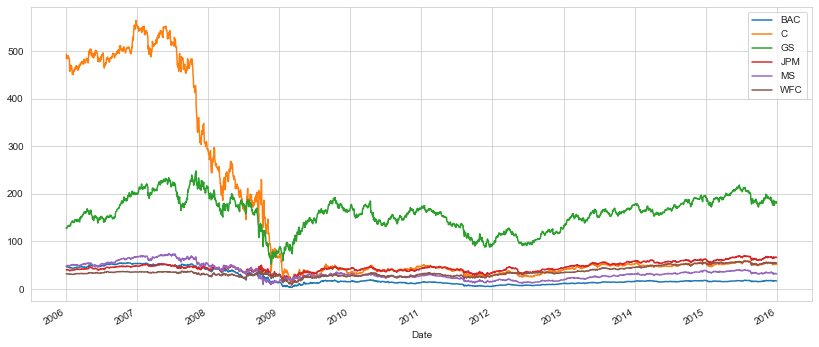

In [62]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick, figsize=(14,6))
plt.legend()
# Now we notice why Citi group had higher standard deviation! especially in 2009 due to crash

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

**Plotting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

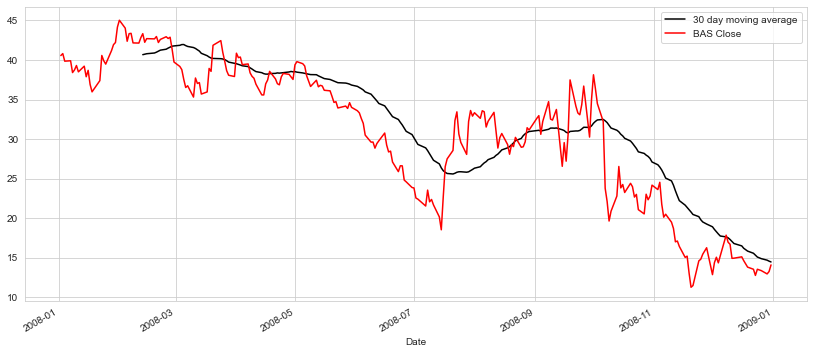

In [63]:
plt.figure(figsize=(14,6))
BAC['Close'].loc['2008-1-1':'2008-12-31'].rolling(window=30).mean().plot(label='30 day moving average', color='black')
BAC['Close'].loc['2008-1-1':'2008-12-31'].plot(label='BAS Close', color='red')
plt.legend()

**Heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

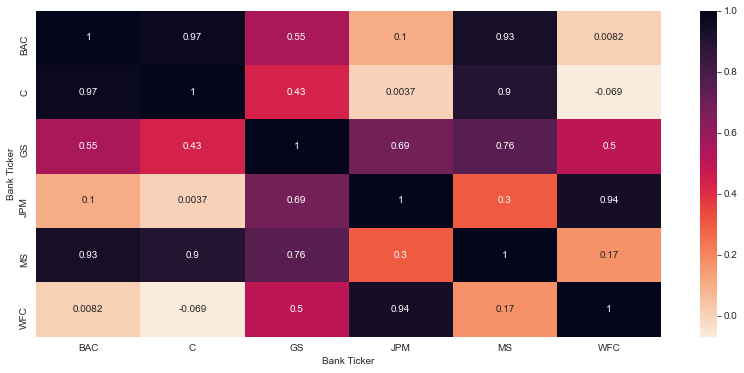

In [64]:
plt.figure(figsize=(14,6))
corr = bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()
sns.heatmap(corr, annot=True, cmap='rocket_r')

**Clustermap to cluster the correlations**

<Figure size 864x576 with 0 Axes>

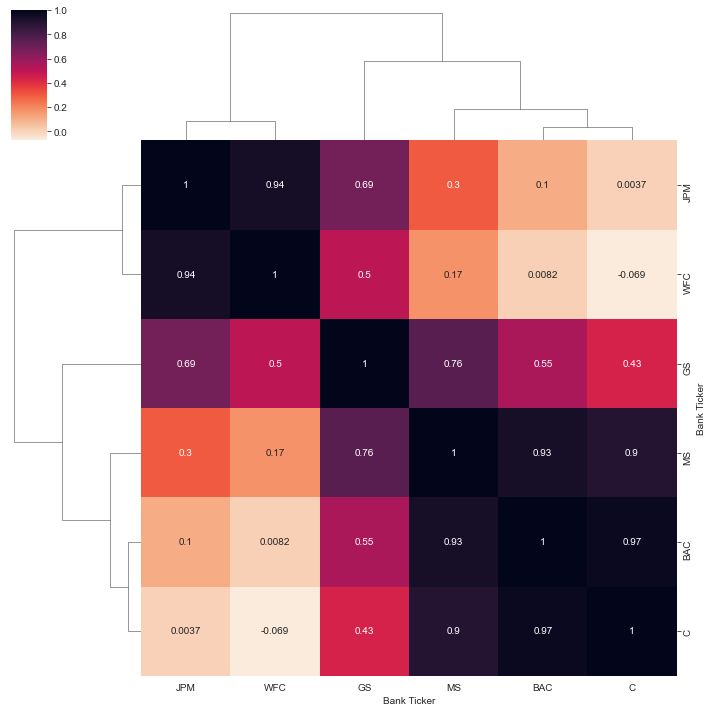

In [58]:
plt.figure(figsize=(12,8))
corr = bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()
sns.clustermap(corr, annot=True, cmap='rocket_r')